# Practical Statistics Chapter 2

## Sampling Distribution of a Statistic

In [1]:
import pandas as pd

In [2]:
players_data_import = pd.read_csv("data/NFL2022/players.csv")
players_data_import

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


In [3]:
#height of players is writen in feet and inches, we need to convert it to inches. 

players_data_import["height_inches"] = players_data_import["height"].apply(lambda x: int(x.split("-")[0])*12 + int(x.split("-")[1]) if len(x.split("-")) == 2 else int(x))

players_data_import

,nflId,height,weight,birthDate,collegeName,Position,displayName,height_inches
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,73
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,72
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,72
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,73
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,73
...,...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton,75
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes,75
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron,69
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill,73


### Central Limit Theorem

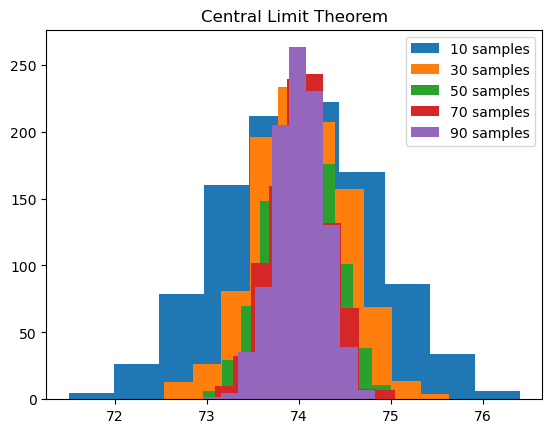

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

sample_amounts = range(10, 100, 20)

for x in sample_amounts:
    samples = []
    for i in range(1000):
        samples.append(players_data_import["height_inches"].sample(x).mean())
    plt.hist(samples)
plt.legend([str(z) + " samples" for z in sample_amounts])
plt.title("Central Limit Theorem")

plt.show()

In [5]:
# Standard Error

players_data_import["height_inches"].sem()

0.05065243293253027

In [38]:
# Bootstrap

from sklearn.utils import resample

results = []
for nrepeat in range(500):
    sample = resample(players_data_import["height_inches"])
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics: ')
print(f'Original: {players_data_import["height_inches"].median()} ')
print(f'Bias: {results.mean() - players_data_import["height_inches"].median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics: 
Original: 74.0 
Bias: 0.0
std. error: 0.0


In [39]:
# Bootstrap

from sklearn.utils import resample

results = []
for nrepeat in range(1000):
    sample = resample(players_data_import["height_inches"])
    results.append(sample.mean())
results = pd.Series(results)
print('Bootstrap Statistics: ')
print(f'Original: {players_data_import["height_inches"].mean()} ')
print(f'Bias: {results.mean() - players_data_import["height_inches"].mean()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics: 
Original: 74.0106149341142 
Bias: -0.00038067349926507177
std. error: 0.04948246170206483


### Confidence Intervals

In [41]:
import numpy as np
import scipy.stats as st

#define sample data
data = players_data_import["height_inches"].sample(20)

st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

C:\Users\zik__\AppData\Local\Temp\ipykernel_1712\1803594564.py:7: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))


(73.64688450504379, 75.5531154949562)

In [42]:
import numpy as np
import scipy.stats as st

#define sample data
np.random.seed(0)
data = players_data_import["height_inches"].sample(1500)

st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

C:\Users\zik__\AppData\Local\Temp\ipykernel_1712\2820913440.py:8: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))


(73.92579453716581, 74.1902054628342)

### Normal and Gaussian Distribution

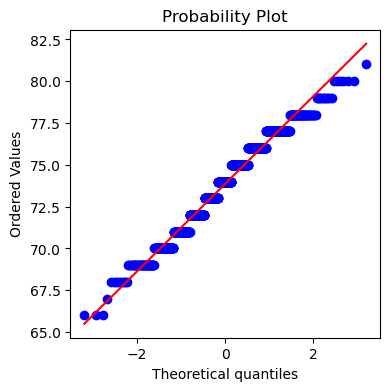

In [45]:
## QQ Plot
## Example of NORMAL DISTRIBUTION
import matplotlib.pyplot as plt
from scipy import stats

fig, ax = plt.subplots(figsize=(4,4))
norm_sample = players_data_import["height_inches"].sample(1000)
stats.probplot(norm_sample, plot=ax)

plt.show()

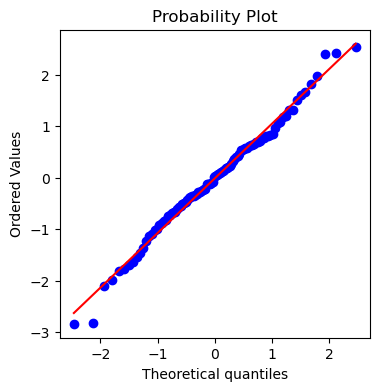

In [46]:
## QQ Plot
## Example of NORMAL DISTRIBUTION
import matplotlib.pyplot as plt
from scipy import stats

fig, ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.show()